In [1]:
import io
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

In [42]:
# >from CPU
#with open(file_path, "rb") as file:
#    data = pickle.load(file)


# >from GPU
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


with open(file_path, 'rb') as df:
     data = CPU_Unpickler(df).load()

print(data)

{'folds': [{'fold': 0, 'epochs': [{'epoch': 0, 'training': {'loss': tensor(0.6774, requires_grad=True), 'accuracy': 0.5044444444444445, 'precision': 0.3550140317361589, 'recall': 0.33942079026006894, 'f1': 0.34508547008547014, 'auc_ovr': 0.5239869682276224, 'auc_ovo': 0.5085555270518974, 'mcc': 0.06643390742228956}, 'validation': {'loss': tensor(0.7524), 'accuracy': 0.71, 'precision': 0.48245614035087714, 'recall': 0.44943502824858755, 'f1': 0.4492283950617284, 'auc_ovr': 0.698164654328875, 'auc_ovo': 0.6521892655367232, 'mcc': 0.3909656978848438}}, {'epoch': 1, 'training': {'loss': tensor(0.2816, requires_grad=True), 'accuracy': 0.8055555555555556, 'precision': 0.5335188473036884, 'recall': 0.5392980704564206, 'f1': 0.5363891960466651, 'auc_ovr': 0.800331045831426, 'auc_ovo': 0.7256352463910133, 'mcc': 0.6033583522007973}, 'validation': {'loss': tensor(0.3994), 'accuracy': 0.92, 'precision': 0.6268656716417911, 'recall': 0.6083333333333333, 'f1': 0.6135391751830107, 'auc_ovr': 0.90036

/var/folders/54/7vzdgfgj2h553mb_db09hz900000gn/T/ipykernel_75391/4211126114.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return lambda b: torch.load(io.BytesIO(b), m

In [104]:
with open('/Users/lune/ISP/rolling-in-the-deep/experiments/2025-W3-01-13/results/inception_v3.pkl', 'rb') as df:
     data1 = CPU_Unpickler(df).load()

with open('/Users/lune/ISP/rolling-in-the-deep/experiments/2025-W3-01-13/results/efficientnet_b0.pkl', 'rb') as df:
     data2 = CPU_Unpickler(df).load()
     
with open('/Users/lune/ISP/rolling-in-the-deep/experiments/2025-W3-01-13/results/regnety_002.pkl', 'rb') as df:
     data3 = CPU_Unpickler(df).load()

/var/folders/54/7vzdgfgj2h553mb_db09hz900000gn/T/ipykernel_75391/4211126114.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return lambda b: torch.load(io.BytesIO(b), m

In [105]:
metrics1 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data1['folds']]
metrics2 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data2['folds']]
metrics3 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data3['folds']]

# metrics across epochs

## one model - each separate fold

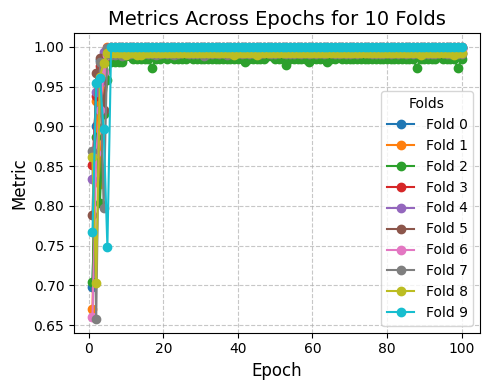

In [43]:
plt.figure(figsize=(5, 4))

for fold in data['folds']:
    fold_number = fold['fold']
    epochs = [i['epoch']+1 for i in fold['epochs']]
    metrics = [i['validation']['auc_ovr'] for i in fold['epochs']]
    plt.plot(epochs, metrics, marker='o', label=f'Fold {fold_number}')

plt.title('Metrics Across Epochs for 10 Folds', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Folds", loc='lower right', fontsize=10)
plt.tight_layout()

plt.show()

## one model - mean of folds

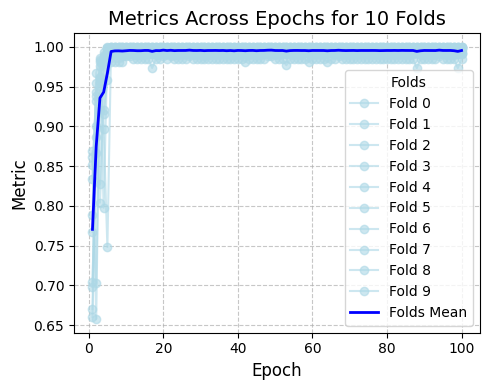

In [44]:
plt.figure(figsize=(5, 4))

metrics_to_save = []

for fold in data['folds']:
    fold_number = fold['fold']
    epochs = [i['epoch']+1 for i in fold['epochs']]
    metrics = [i['validation']['auc_ovr'] for i in fold['epochs']]
    metrics_to_save.append(metrics)
    plt.plot(epochs, metrics, color='lightblue', alpha=0.6, marker='o', label=f'Fold {fold_number}')

metrics_to_save = np.array(metrics_to_save)
mean_metric = np.mean(metrics_to_save, axis=0)
plt.plot(epochs, mean_metric, color='blue', linewidth=2, label='Folds Mean')


plt.title('Metrics Across Epochs for 10 Folds', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Folds", loc='lower right', fontsize=10)
plt.tight_layout()

plt.show()

## one model - mean of folds + bootstrapped CI

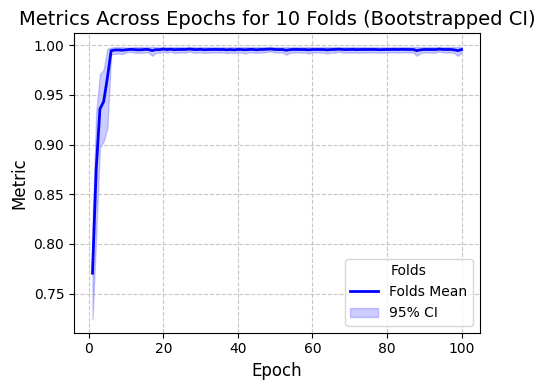

In [69]:
n_bootstrap = 1000 
confidence_level = 0.95 

plt.figure(figsize=(5, 4))

metrics_to_save = []
for fold in data['folds']:
    fold_number = fold['fold']
    epochs = [i['epoch']+1 for i in fold['epochs']]
    metrics = [i['validation']['auc_ovr'] for i in fold['epochs']]
    metrics_to_save.append(metrics)
    #plt.plot(epochs, metrics, color='lightblue', alpha=0.6, marker='o', label=f'Fold {fold_number}')
metrics_to_save = np.array(metrics_to_save)

mean_metric = np.mean(metrics_to_save, axis=0)
plt.plot(epochs, mean_metric, color='blue', linewidth=2, label='Folds Mean')

# CI using bootstrap - to find true mean
bootstrap_means = np.zeros((n_bootstrap, metrics_to_save.shape[1]))
for i in range(n_bootstrap):
    # resample 10 folds with replacement
    bootstrap_sample = np.random.choice(metrics_to_save.shape[0], metrics_to_save.shape[0], replace=True)
    bootstrap_means[i, :] = np.mean(metrics_to_save[bootstrap_sample, :], axis=0)

lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100, axis=0)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100, axis=0)
plt.fill_between(epochs, lower_bound, upper_bound, color='blue', alpha=0.2, label=f'{int(confidence_level*100)}% CI')

plt.title('Metrics Across Epochs for 10 Folds (Bootstrapped CI)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Folds", loc='lower right', fontsize=10)
plt.tight_layout()

plt.show()


## three models - mean of folds + bootstrapped CI

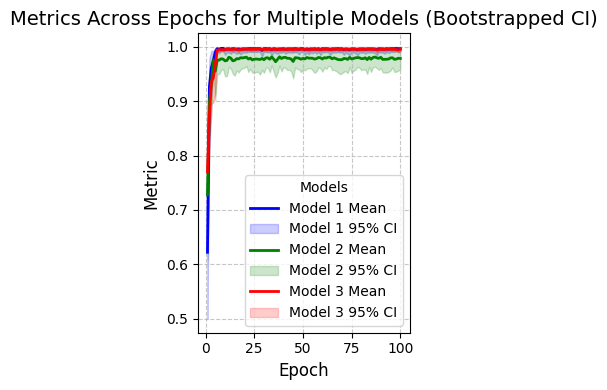

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration for bootstrapping
n_bootstrap = 1000  # Number of bootstrap samples
confidence_level = 0.95  # Confidence level (e.g., 95%)

# Assume data1, data2, and data3 represent your three models' data
datasets = [data1, data2, data3]  # Organize datasets into a list
model_names = ['Model 1', 'Model 2', 'Model 3']  # Names for the models
colors = ['blue', 'green', 'red']  # Colors for the plots

plt.figure(figsize=(3, 4))

for model_idx, data in enumerate(datasets):
    metrics_to_save = []

    # Collect metrics for all folds
    for fold in data['folds']:
        metrics = [epoch['validation']['auc_ovr'] for epoch in fold['epochs']]
        metrics_to_save.append(metrics)

    metrics_to_save = np.array(metrics_to_save)  # Shape: (num_folds, num_epochs)
    mean_metric = np.mean(metrics_to_save, axis=0)

    # Initialize arrays for bootstrap confidence intervals
    bootstrap_means = np.zeros((n_bootstrap, metrics_to_save.shape[1]))

    # Perform bootstrapping
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(metrics_to_save.shape[0], metrics_to_save.shape[0], replace=True)
        bootstrap_means[i, :] = np.mean(metrics_to_save[bootstrap_sample, :], axis=0)

    # Compute confidence intervals
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100, axis=0)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100, axis=0)

    # Plot the mean line and confidence intervals
    epochs = np.arange(1, metrics_to_save.shape[1] + 1)  # Epoch indices
    plt.plot(epochs, mean_metric, color=colors[model_idx], label=f'{model_names[model_idx]} Mean', linewidth=2)
    plt.fill_between(epochs, lower_bound, upper_bound, color=colors[model_idx], alpha=0.2, label=f'{model_names[model_idx]} 95% CI')

# Add labels, title, and legend
plt.title('Metrics Across Epochs for Multiple Models (Bootstrapped CI)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()


## remove

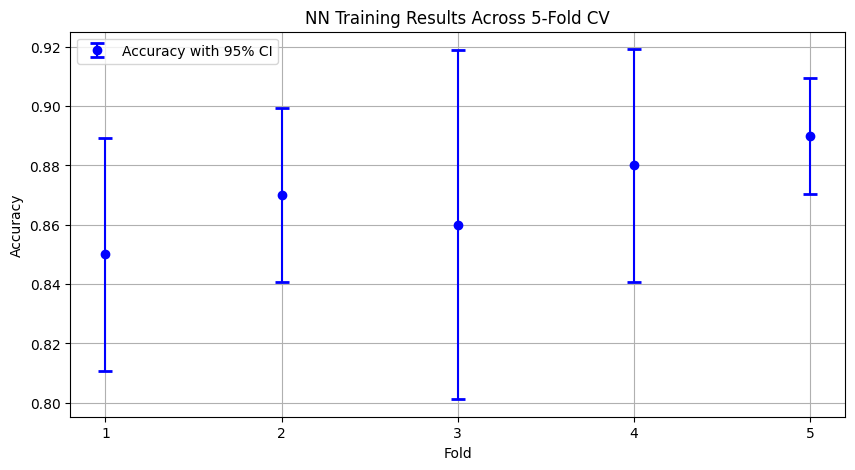

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: mean accuracies and standard deviations for 5 folds
mean_accuracies = np.array([0.85, 0.87, 0.86, 0.88, 0.89])
std_devs = np.array([0.02, 0.015, 0.03, 0.02, 0.01])

# Calculate the confidence intervals (CIs)
# Assuming a normal distribution, the 95% CI corresponds to 1.96 * Standard Deviation
ci = 1.96 * std_devs

# Define the folds
folds = np.arange(1, 6)

# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(folds, mean_accuracies, yerr=ci, fmt='o', capsize=5, capthick=2, color='blue', label='Accuracy with 95% CI')

plt.xticks(folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('NN Training Results Across 5-Fold CV')
plt.legend()
plt.grid(True)
plt.show()

# metrics comparison

In [75]:
metrics1 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data1['folds']]
metrics2 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data2['folds']]
metrics3 = [fold['epochs'][-1]['validation']['auc_ovr'] for fold in data3['folds']]

In [62]:
stat, p = wilcoxon(metrics1, metrics2)

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

Test Statistic: 12.0
P-value: 0.21352435403618242


Comparison: Model A vs Model B
  Test Statistic: 6.0
  P-value: 0.0506
Comparison: Model A vs Model C
  Test Statistic: 12.0
  P-value: 0.2135
Comparison: Model B vs Model C
  Test Statistic: 13.0
  P-value: 0.1602


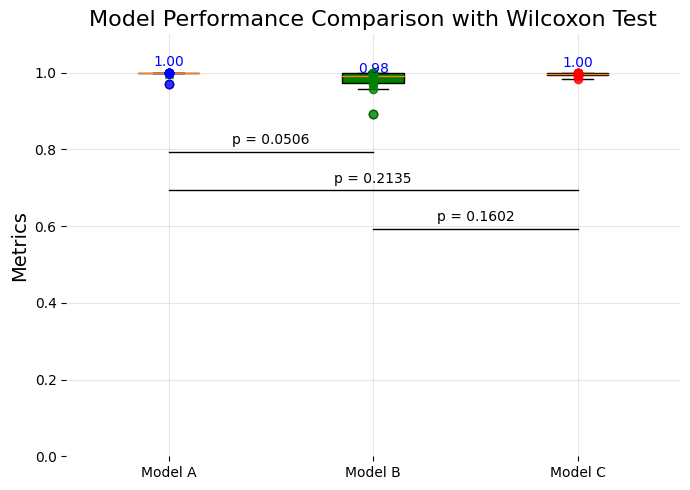

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Example metrics for three models
#metrics1 = np.random.rand(20) + 0.5  # Model 1
#metrics2 = np.random.rand(20) + 0.4  # Model 2
#metrics3 = np.random.rand(20) + 0.6  # Model 3

# Perform Wilcoxon tests for pairwise comparisons
comparisons = [("Model A", "Model B", metrics1, metrics2),
               ("Model A", "Model C", metrics1, metrics3),
               ("Model B", "Model C", metrics2, metrics3)]

results = []
for model_a, model_b, metrics_a, metrics_b in comparisons:
    stat, p = wilcoxon(metrics_a, metrics_b)
    results.append((model_a, model_b, stat, p))

# Print results
for model_a, model_b, stat, p in results:
    print(f"Comparison: {model_a} vs {model_b}")
    print(f"  Test Statistic: {stat}")
    print(f"  P-value: {p:.4f}")

# Plot the metrics with boxplots and significance annotations
plt.figure(figsize=(7, 5))

# Boxplot for the three models
metrics_list = [metrics1, metrics2, metrics3]
labels = ["Model A", "Model B", "Model C"]
colors = ['blue', 'green', 'red']

box = plt.boxplot(metrics_list, labels=labels, patch_artist=True, showmeans=True)

# Apply colors to boxplots
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add jittered scatter points for individual metrics
jitter = 0.00
for i, (metrics, color) in enumerate(zip(metrics_list, colors)):
    x = np.random.normal(i + 1, jitter, size=len(metrics))  # Jittered x positions
    plt.scatter(x, metrics, color=color, alpha=0.8, zorder=3, label=f"{labels[i]} Performance" if i == 0 else None)

    # Add mean value above each boxplot
    mean_value = np.mean(metrics)
    plt.text(i + 1, mean_value + 0.02, f"{mean_value:.2f}", ha="center", fontsize=10, color="blue")

# Add significance lines and p-values
y_min = max(max(metrics1), max(metrics2), max(metrics3)) + 0.1
for i, (model_a, model_b, stat, p) in enumerate(results):
    if p < 1:  # Significant difference
        idx_a = labels.index(model_a) + 1
        idx_b = labels.index(model_b) + 1
        y_line = y_min - (0.2 + i * 0.1)  # Adjust height to avoid overlap
        plt.plot([idx_a, idx_b], [y_line, y_line], color="black", linewidth=1)
        plt.text((idx_a + idx_b) / 2, y_line + 0.02, f"p = {p:.4f}", ha="center", fontsize=10)

# Set y-axis limit
plt.ylim(0, 1.1)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


# Add labels, title, and grid
plt.ylabel('Metrics', fontsize=14)
plt.title('Model Performance Comparison with Wilcoxon Test', fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


# double plot

tensor(0.0006)
tensor(-0.0494)
tensor(-0.0994)
tensor(-0.1494)


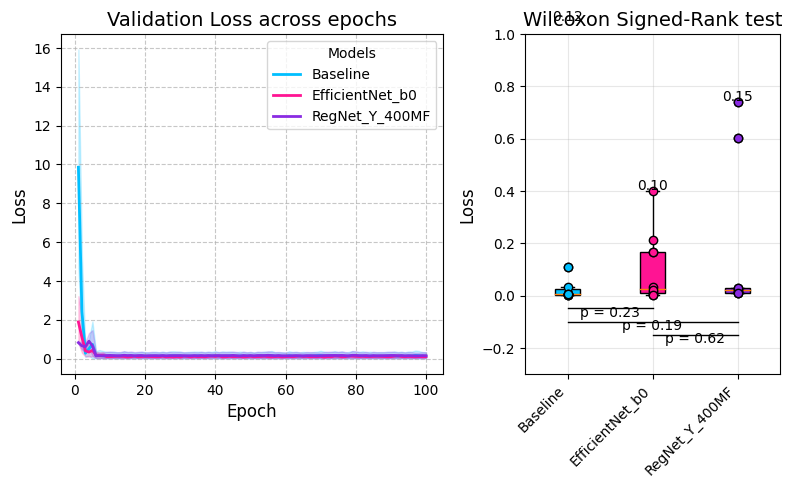

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

metric = 'loss'
metric_name = 'Loss'

metrics1 = [fold['epochs'][-1]['validation'][metric] for fold in data1['folds']]
metrics2 = [fold['epochs'][-1]['validation'][metric] for fold in data2['folds']]
metrics3 = [fold['epochs'][-1]['validation'][metric] for fold in data3['folds']]

# Configuration for bootstrapping
n_bootstrap = 1000
confidence_level = 0.95


datasets = [data1, data2, data3]
model_names = ['Baseline', 'EfficientNet_b0', 'RegNet_Y_400MF']
colors = ['deepskyblue', 'deeppink', 'blueviolet']

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [1.5, 1]})

# Epoch Plot (Left)
for model_idx, data in enumerate(datasets):
    metrics_to_save = []

    for fold in data['folds']:
        metrics = [epoch['validation'][metric] for epoch in fold['epochs']]
        metrics_to_save.append(metrics)

    metrics_to_save = np.array(metrics_to_save)
    mean_metric = np.mean(metrics_to_save, axis=0)

    bootstrap_means = np.zeros((n_bootstrap, metrics_to_save.shape[1]))

    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(metrics_to_save.shape[0], metrics_to_save.shape[0], replace=True)
        bootstrap_means[i, :] = np.mean(metrics_to_save[bootstrap_sample, :], axis=0)

    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100, axis=0)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100, axis=0)

    epochs = np.arange(1, metrics_to_save.shape[1] + 1)
    axes[0].plot(epochs, mean_metric, color=colors[model_idx], label=f'{model_names[model_idx]}', linewidth=2)
    axes[0].fill_between(epochs, lower_bound, upper_bound, color=colors[model_idx], alpha=0.2) #label=f'{model_names[model_idx]} 95% CI'

axes[0].set_title(f'Validation {metric_name} across epochs', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel(metric_name, fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Models", fontsize=10)

# Comparison Plot (Right)
comparisons = [
    ('Baseline', "EfficientNet_b0", metrics1, metrics2),
    ('Baseline', "RegNet_Y_400MF", metrics1, metrics3),
    ("EfficientNet_b0", "RegNet_Y_400MF", metrics2, metrics3),
]

results = []
for model_a, model_b, metrics_a, metrics_b in comparisons:
    stat, p = wilcoxon(metrics_a, metrics_b)
    results.append((model_a, model_b, stat, p))

metrics_list = [metrics1, metrics2, metrics3]
labels = ["Baseline", "EfficientNet_b0", "RegNet_Y_400MF"]

box = axes[1].boxplot(metrics_list, labels=labels, patch_artist=True, showmeans=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

jitter = 0.0
for i, (metrics, color) in enumerate(zip(metrics_list, colors)):
    x = np.random.normal(i + 1, jitter, size=len(metrics))
    axes[1].scatter(x, metrics, color=color, edgecolor="black", alpha=1, zorder=3)

    max_value = np.max(metrics)
    mean_value = np.mean(metrics)
    axes[1].text(i + 1, max_value + 0.005, f"{mean_value:.2f}", ha="center", fontsize=10, color="black")

y_min = min(min(metrics1), min(metrics2), min(metrics3)) 
print(y_min)
for i, (model_a, model_b, stat, p) in enumerate(results):
    if p < 1:
        idx_a = labels.index(model_a) + 1
        idx_b = labels.index(model_b) + 1
        y_line = y_min - (0.05 + i * 0.05)
        print(y_line)
        axes[1].plot([idx_a, idx_b], [y_line, y_line], color="black", linewidth=1)
        axes[1].text((idx_a + idx_b) / 2, y_line - 0.03, f"p = {p:.2f}", ha="center", fontsize=10)

axes[1].set_ylim(-0.3, 1)
axes[1].set_ylabel(metric_name, fontsize=12)
axes[1].set_xticklabels(labels, rotation=45, ha='right') 
axes[1].set_title('Wilcoxon Signed-Rank test', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [212]:
import pandas as pd

In [215]:
# Configuration for bootstrapping
n_bootstrap = 1000
confidence_level = 0.95

datasets = [data1, data2, data3]
list_datasets = ["Baseline", "EfficientNet_b0", "RegNet_Y_400MF"]
list_metrics = ['accuracy', 'f1', 'precision', 'recall', 'auc_ovr', 'auc_ovo', 'mcc']

results = {"Metric": list_metrics}
for model_idx, data in enumerate(datasets):
    print(list_datasets[model_idx])
    model_results = []
    

    for metric in list_metrics:
        print(metric)

        # mean
        metrics_to_save = []
        for fold in data['folds']:
            metrics = [epoch['validation'][metric] for epoch in fold['epochs']]
            metrics_to_save.append(metrics)

        metrics_to_save = np.array(metrics_to_save)
        mean_metric = np.mean(metrics_to_save, axis=0)

        # CI
        bootstrap_means = np.zeros((n_bootstrap, metrics_to_save.shape[1]))
        for i in range(n_bootstrap):
            bootstrap_sample = np.random.choice(metrics_to_save.shape[0], metrics_to_save.shape[0], replace=True)
            bootstrap_means[i, :] = np.mean(metrics_to_save[bootstrap_sample, :], axis=0)

        lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100, axis=0)
        upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100, axis=0)
        
        
        print(f"{mean_metric[99]:.3f} CI ({lower_bound[99]:.3f}-{upper_bound[99]:.3f})")
        model_results.append(f"{mean_metric[99]:.2f} (CI {lower_bound[99]:.2f}-{upper_bound[99]:.2f})")

    results[list_datasets[model_idx]] = model_results

results_table = pd.DataFrame(results)
results_table

Baseline
accuracy
0.984 CI (0.979-0.989)
f1
0.859 CI (0.785-0.930)
precision
0.832 CI (0.758-0.910)
recall
0.925 CI (0.826-0.992)
auc_ovr
0.997 CI (0.991-1.000)
auc_ovo
0.991 CI (0.974-1.000)
mcc
0.968 CI (0.959-0.978)
EfficientNet_b0
accuracy
0.957 CI (0.937-0.975)
f1
0.785 CI (0.693-0.889)
precision
0.776 CI (0.686-0.872)
recall
0.807 CI (0.704-0.914)
auc_ovr
0.979 CI (0.958-0.994)
auc_ovo
0.970 CI (0.942-0.991)
mcc
0.915 CI (0.876-0.952)
RegNet_Y_400MF
accuracy
0.974 CI (0.963-0.985)
f1
0.837 CI (0.756-0.918)
precision
0.813 CI (0.736-0.897)
recall
0.918 CI (0.820-0.989)
auc_ovr
0.995 CI (0.992-0.998)
auc_ovo
0.991 CI (0.982-0.998)
mcc
0.949 CI (0.928-0.969)


,Metric,Baseline,EfficientNet_b0,RegNet_Y_400MF
0,accuracy,0.98 (CI 0.98-0.99),0.96 (CI 0.94-0.97),0.97 (CI 0.96-0.98)
1,f1,0.86 (CI 0.79-0.93),0.79 (CI 0.69-0.89),0.84 (CI 0.76-0.92)
2,precision,0.83 (CI 0.76-0.91),0.78 (CI 0.69-0.87),0.81 (CI 0.74-0.90)
3,recall,0.92 (CI 0.83-0.99),0.81 (CI 0.70-0.91),0.92 (CI 0.82-0.99)
4,auc_ovr,1.00 (CI 0.99-1.00),0.98 (CI 0.96-0.99),1.00 (CI 0.99-1.00)
5,auc_ovo,0.99 (CI 0.97-1.00),0.97 (CI 0.94-0.99),0.99 (CI 0.98-1.00)
6,mcc,0.97 (CI 0.96-0.98),0.91 (CI 0.88-0.95),0.95 (CI 0.93-0.97)


In [216]:
! pwd

/Users/lune/ISP/rolling-in-the-deep/notebooks


In [ ]:
!

In [217]:
results_table.to_excel("metrics_table.xlsx", index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [221]:
print(round(2333/4))
print(round(1628/4))
print(round(39/4))

583
407
10
